# Random Forest Classification

You will be building a model on the iris flower dataset, which is a very famous classification set. It comprises sepal length, sepal width, petal length, petal width, and type of flower. There are three species or classes: setosa, versicolor, and virginia. You will build a model to classify the type of flower. The dataset is available in the scikit-learn library or you can download it from UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with `load_iris()`. 

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

You can print the target and feature names, to make sure you have the right dataset, as such:

In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [4]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here, you can create a dataframe of iris data set in following way. 

In [5]:
# Creating a dataframe of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0], 
    'sepal width':iris.data[:,1], 
    'petal length':iris.data[:,2], 
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


First, you separate the columns into dependent and independent variables(or features and label). Then you split those variable into train and test set. 

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

After spliting, you will generate random forest model on training set and perform prediction on test set features. 

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

After model generation, check the accuracy using actual and predicted values. 

In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.93333333333333335)


you can also make prediciton for single individual. 

For example, 

sepal length=3 
sepal width=5
petal length=4 
petal width=2

Now you can predict the "Which type of flower is?"

In [13]:
clf.predict([[3, 5, 4, 2]])

array([2])

Here, 2 indicates the flower type: 'Virginica'

## Finding Important Features in Scikit-learn

Here, you are finding important features or selecting features in given IRIS dataset. In scikit-learn, you can perform this task in following steps:
- First, you need to create random forest model.
- Second, use feature importance variable to see feature importance scores.
- Third, visualize these scores using seaborn library.

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.458607
petal length (cm)    0.413859
sepal length (cm)    0.103600
sepal width (cm)     0.023933
dtype: float64

You can also visualize the feature importance. Visualization are easy to understand and interpretable. Also, visualization has highest bandwodth channel to the human brain.

For visualizing you can use a combination of matplot and seaborn because seaborn built on the top of matplotlib, offers a number of customized themes  and provides additional plot types. Matplotlib is superset of seaborn and both are equally required for good visualisation.

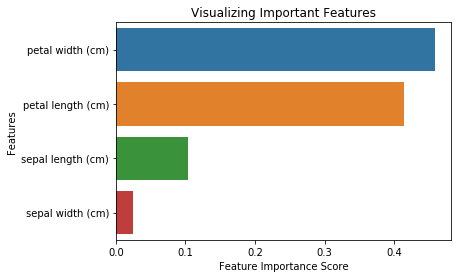

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels in your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Again Generating Model on Selected Features

Here, you can remove the feature "sepal width" and select remaining 3 features because it has very low importance.  

In [19]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

After spliting, you will generate random forest model on selected training set features, perform prediction on selected test set features and compare actual and predicted values. 

In [18]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.95238095238095233)


Here you can see, after removing less important features(sepal length) accuracy got increased because it reduces misleading 
data and noise, which increases the accuracy. Also less number of important feature reduces training time.